# Sonar Classification using Decision Tree

In this notebook I will build a model to classify the classic Sonar. Dataset is collection of sonar data. Which Predict weather we have found rock or mine. It contains various data column which consist sonar data. Last column tells us weather it has found rock or mine.

### Step 01: Importing Libs

I will use pandas and numpy libraries for data structures, sklearn for everything that involves learning, and matplotlib for graphs

In [1]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt

### Step 02: Loading Sonar dataset

I'm using a .xlxs that my teacher gave me, but it's the same as https://www.kaggle.com/datasets/mayurdalvi/sonar-mine-dataset/data

In [2]:
sonar = pd.read_excel('../../datasets/sonar.xlsx', sheet_name=0)  

print("\nDimensions: {0}".format(sonar.shape))
#print("\nAttributes: {0}".format(sonar.keys()))
sonar.describe()


Dimensions: (208, 61)


,Atributo_1,Atributo_2,Atributo_3,Atributo_4,Atributo_5,Atributo_6,Atributo_7,Atributo_8,Atributo_9,Atributo_10,...,Atributo_51,Atributo_52,Atributo_53,Atributo_54,Atributo_55,Atributo_56,Atributo_57,Atributo_58,Atributo_59,Atributo_60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


### Step 03: Preprocessing

Separating features and labels from the sonar dataset, transforming categorical labels into numeric values

In [22]:
X = sonar.iloc[:,0:(sonar.shape[1] - 1)]

le = LabelEncoder()
y = le.fit_transform(sonar.iloc[:,(sonar.shape[1] - 1)])

### Step 04: Separating bases and Creating Model

First the division is made, where X corresponds to the values and y corresponds to the class. To partition the training and testing base, we will use the train_test_split method provided by sklearn. By default, this division is 75% of the data for the training base and 25% of the data for the test base. As we have little data, we will use 90% for the training base and 10% for the testing base.

After, the model is created and trained.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.1)
print("Total elements:", X.shape, "| train:", X_train.shape, "| test:", X_test.shape)

sonar_tree = DecisionTreeClassifier(random_state=0, criterion='entropy')
sonar_tree = sonar_tree.fit(X_train, y_train)
print("Accuracy (training base):", sonar_tree.score(X_train, y_train))

Total elements: (208, 60) | train: (187, 60) | test: (21, 60)
Accuracy (training base): 1.0


### Step 05: Evaluating Model

Performing label prediction on a test dataset and evaluating the performance of the classification model:

In [24]:
y_pred = sonar_tree.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["Mine", "Rock"]))

Accuracy: 0.7142857142857143
              precision    recall  f1-score   support

        Mine       0.60      0.75      0.67         8
        Rock       0.82      0.69      0.75        13

    accuracy                           0.71        21
   macro avg       0.71      0.72      0.71        21
weighted avg       0.74      0.71      0.72        21



### Step 06: Confusion Matrix

Displays a confusion matrix to evaluate the performance of the classification model. The confusion matrix is a table that allows you to visualize the performance of the classification algorithm, showing the count of true positives, false positives, true negatives and false negatives for each class

In [25]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=["Mine", "Rock"], columns=["Mine (prev)", "Rock (prev)"])
print(cnf_table)

      Mine (prev)  Rock (prev)
Mine            6            2
Rock            4            9


### Step 07: Visualizing Decision Tree

Plots and displays a decision tree with visual formatting.

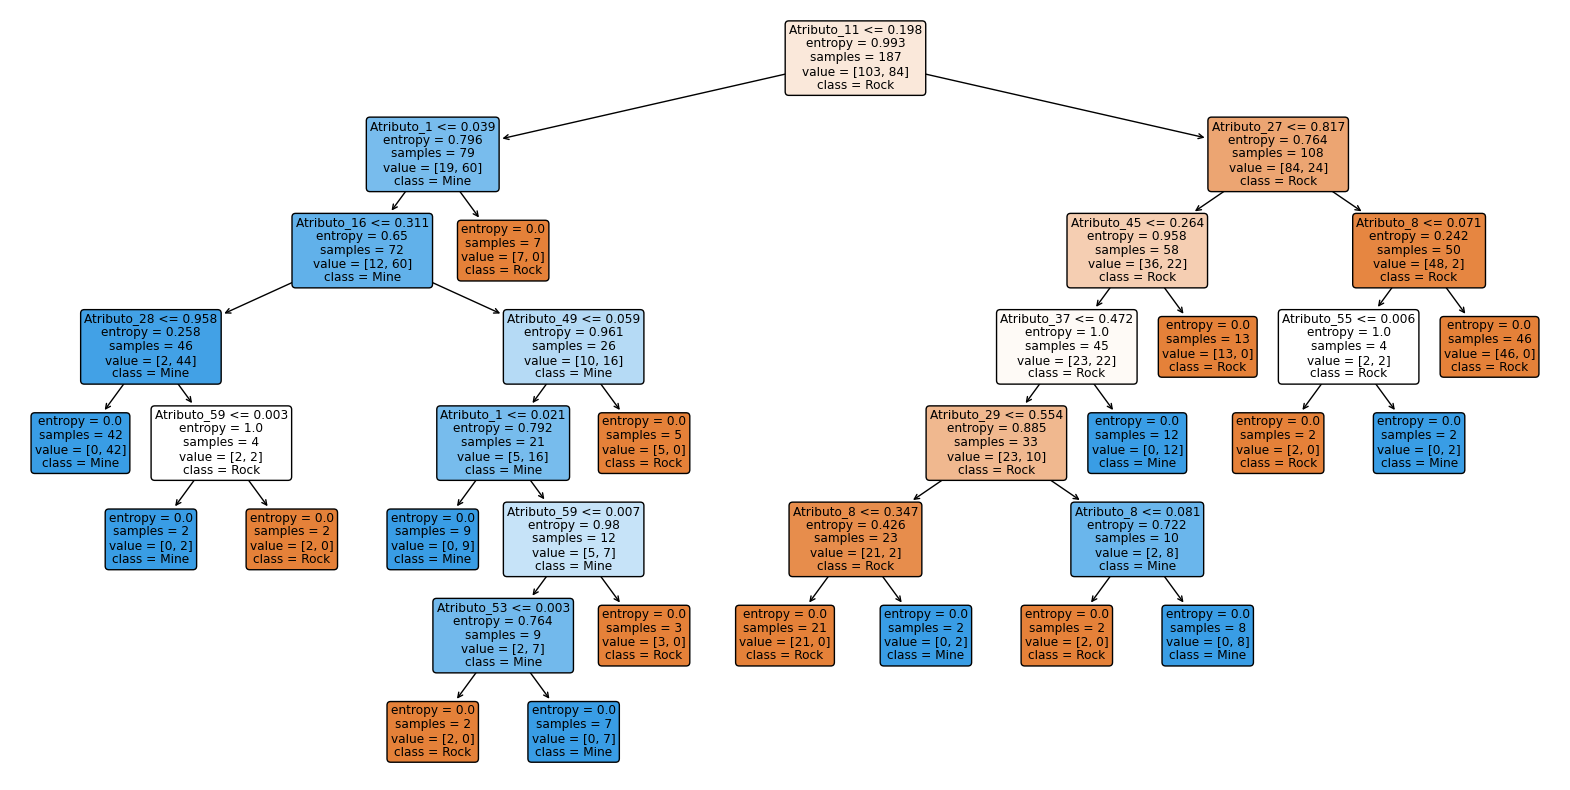

In [26]:
plt.figure(figsize=(20,10))
plot_tree(sonar_tree, feature_names=X.columns, class_names=['Rock', 'Mine'], filled=True, rounded=True)  
plt.show() 